In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
import gmaps
import json
import urllib

#Import API keys
from config import (api_key, gkey)


# Configure gmaps
gmaps.configure(api_key=gkey)

#Import Manhattan zones csv
manhattan_zones = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/manhattan_zones.csv")
manhattan_zones.head()

,LocationID,Borough,Zone,service_zone
0,4,Manhattan,Alphabet City,Yellow Zone
1,12,Manhattan,Battery Park,Yellow Zone
2,13,Manhattan,Battery Park City,Yellow Zone
3,24,Manhattan,Bloomingdale,Yellow Zone
4,41,Manhattan,Central Harlem,Boro Zone


In [78]:
#Import Taxi June 2015 data
june_2015_taxi = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/taxi_june_2015.csv")

#Import FHV June 2015 data
june_2015_fhv = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/FHV_june_2015.csv")

#Import Taxi Dec 2015 data
dec_2015_taxi = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/taxi_dec_2015.csv")

#Import FHV Dec 2015 data
dec_2015_fhv = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/FHV_dec_2015.csv")

#Import Taxi June 2019 csv data
june_2019_taxi = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/taxi_june_2019.csv")

#Import FHV June 2019 csv data
june_2019_highvol = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/HighVol_june_2019.csv")

#Import Taxi Dec 2019 data
dec_2019_taxi = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/taxi_dec_2019.csv")

#Import FHV Dec 2019 csv data
dec_2019_highvol = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/clean_csvs/HighVol_dec_2019.csv")

#Import Manhattan Taxi Zones
manhattan_zone_locations = pd.read_csv("../../../Desktop/NYC Taxi & FHV Data/Manhattan_pickup_loc.csv")

# Percent of rides

In [3]:
#Taxi data June 2015
#count number of rides by date
ride_numbers_june_2015 = june_2015_taxi["tpep_pickup_datetime"].value_counts()

#Format data frame and sort
ride_numbers_june_2015_df = pd.DataFrame(ride_numbers_june_2015).reset_index().rename(columns = {"index": "Pickup Date", "tpep_pickup_datetime": "Number of Rides June 2015"})
ride_numbers_june_2015_df["Pickup Date"] = pd.to_datetime(ride_numbers_june_2015_df["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_june_2015 = ride_numbers_june_2015_df.sort_values(by = "Pickup Date")

#Display data frame
sorted_ride_numbers_june_2015.head()

,Pickup Date,Number of Rides June 2015
21,06-01,34676
18,06-02,36050
15,06-03,36394
10,06-04,39663
4,06-05,43779


In [4]:
#Taxi data June 2019
#Count number of rides by date for June 2019 taxi data
ride_numbers_june_2019 = june_2019_taxi["pickup_date"].value_counts()

#Format data frame and sort
ride_numbers_june_2019_df = pd.DataFrame(ride_numbers_june_2019).reset_index().rename(columns = {"index": "Pickup Date", "pickup_date": "Number of Rides June 2019"})
ride_numbers_june_2019_df["Pickup Date"] = pd.to_datetime(ride_numbers_june_2019_df["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_june_2019 = ride_numbers_june_2019_df.sort_values(by = "Pickup Date")

#Display data frame
sorted_ride_numbers_june_2019.head()

,Pickup Date,Number of Rides June 2019
0,06-01,9742
15,06-02,8084
21,06-03,7537
20,06-04,7570
5,06-05,8650


In [5]:
#FHV data June 2015
#Count number of rides by date for June 2015 FHV data
ride_numbers_fhv_june_2015 = june_2015_fhv["pickup_date"].value_counts()

#Format data frame and sort
ride_numbers_fhv_june_2015 = pd.DataFrame(ride_numbers_fhv_june_2015).reset_index().rename(columns = {"index": "Pickup Date", "pickup_date": "Number of FHV Rides 2015"})
ride_numbers_fhv_june_2015["Pickup Date"] = pd.to_datetime(ride_numbers_fhv_june_2015["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_fhv_2015 = ride_numbers_fhv_june_2015.sort_values(["Pickup Date"], ascending = True)

#Display data frame
sorted_ride_numbers_fhv_2015.head()

,Pickup Date,Number of FHV Rides 2015
5,06-01,1362
6,06-02,1341
17,06-03,1177
11,06-04,1276
0,06-05,1475


In [136]:
#FHV data June 2019
#Find ride numbers by pickup date
ride_numbers_hvfhv_june_2019 = june_2019_highvol["pickup_datetime"].value_counts()

#Format and sort data frame
ride_numbers_hvfhv_june_2019 = pd.DataFrame(ride_numbers_hvfhv_june_2019).reset_index().rename(columns = {"index": "Pickup Date", "pickup_datetime": "Number of FHV Rides 2019"})
ride_numbers_hvfhv_june_2019["Pickup Date"] = pd.to_datetime(ride_numbers_hvfhv_june_2019["Pickup Date"]).dt.strftime('%m-%d')
sorted_ride_numbers_hvfhv_june = ride_numbers_hvfhv_june_2019.sort_values(["Pickup Date"], ascending = True)

#Display data frame
sorted_ride_numbers_hvfhv_june.head()


,Pickup Date,Number of FHV Rides 2019
0,06-01,10622
3,06-02,9432
27,06-03,7088
26,06-04,7378
17,06-05,8125


In [137]:
#Compare taxi and FHV data in June 2015
combined_june_2015 = sorted_ride_numbers_june_2015.merge(sorted_ride_numbers_fhv_2015, how = "outer", on = "Pickup Date")
combined_june_2015["Total Rides"] = combined_june_2015["Number of Rides June 2015"] + combined_june_2015["Number of FHV Rides 2015"]

#Display data frame
combined_june_2015.head()

,Pickup Date,Number of Rides June 2015,Number of FHV Rides 2015,Total Rides
0,06-01,34676,1362,36038
1,06-02,36050,1341,37391
2,06-03,36394,1177,37571
3,06-04,39663,1276,40939
4,06-05,43779,1475,45254


In [138]:
#Calculate the percent of taxi rides vs FHV rides
percent_rides_taxi = combined_june_2015["Number of Rides June 2015"]/combined_june_2015["Total Rides"] * 100
percent_rides_fhv = combined_june_2015["Number of FHV Rides 2015"]/combined_june_2015["Total Rides"] * 100

#Create new data frame
percent_2015 = pd.DataFrame({"Date": combined_june_2015["Pickup Date"],
                            "Percent Rides Taxi": percent_rides_taxi,
                            "Percent Rides FHV": percent_rides_fhv
                            })

percent_2015.head()

,Date,Percent Rides Taxi,Percent Rides FHV
0,06-01,96.220656,3.779344
1,06-02,96.413575,3.586425
2,06-03,96.867265,3.132735
3,06-04,96.883168,3.116832
4,06-05,96.740620,3.259380


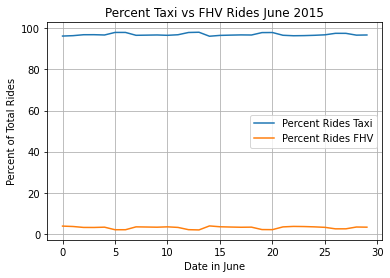

In [139]:
#Line graph comparing percent of total rides for taxi vs FHV in June 2015
line = percent_2015.plot(kind = "line", legend = True)

plt.title("Percent Taxi vs FHV Rides June 2015")
plt.xlabel("Date in June")
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

In [140]:
#Compare taxi and FHV data in June 2019
combined_june_2019 = sorted_ride_numbers_june_2019.merge(sorted_ride_numbers_hvfhv_june, how = "outer", on = "Pickup Date")
combined_june_2019["Total Rides"] = combined_june_2019["Number of Rides June 2019"] + combined_june_2019["Number of FHV Rides 2019"]

#Display data frame
combined_june_2019.head()

,Pickup Date,Number of Rides June 2019,Number of FHV Rides 2019,Total Rides
0,06-01,9742,10622,20364
1,06-02,8084,9432,17516
2,06-03,7537,7088,14625
3,06-04,7570,7378,14948
4,06-05,8650,8125,16775


In [141]:
#Calculate the percent of taxi rides vs FHV rides
percent_rides_taxi = combined_june_2019["Number of Rides June 2019"]/combined_june_2019["Total Rides"] * 100
percent_rides_fhv = combined_june_2019["Number of FHV Rides 2019"]/combined_june_2019["Total Rides"] * 100

#Create new data frame
percent_2019 = pd.DataFrame({"Date": combined_june_2019["Pickup Date"],
                            "Percent Rides Taxi": percent_rides_taxi,
                            "Percent Rides FHV": percent_rides_fhv
                            })

#Display data frame
percent_2019.head()

,Date,Percent Rides Taxi,Percent Rides FHV
0,06-01,47.839324,52.160676
1,06-02,46.152090,53.847910
2,06-03,51.535043,48.464957
3,06-04,50.642226,49.357774
4,06-05,51.564829,48.435171


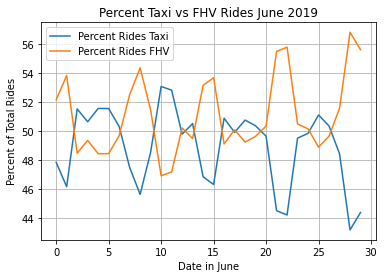

In [142]:
#Line graph comparing percent of total rides for taxi vs FHV in June 2019
line = percent_2019.plot(kind = "line", legend = True)

plt.title("Percent Taxi vs FHV Rides June 2019")
plt.xlabel("Date in June")
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

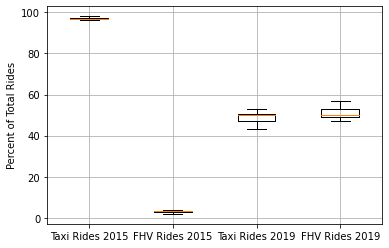

In [143]:
#Compile data for boxplot
plot_data = [percent_2015["Percent Rides Taxi"], percent_2015["Percent Rides FHV"], percent_2019["Percent Rides Taxi"], percent_2019["Percent Rides FHV"]]

#Create boxplot comparing percentage of rides from June 2015 to June 2019
plt.boxplot(plot_data, labels = ["Taxi Rides 2015", "FHV Rides 2015", "Taxi Rides 2019", "FHV Rides 2019"])

plt.title
plt.ylabel("Percent of Total Rides")
plt.grid()
plt.show()

In [144]:
#T-test comparing change in percent taxi rides
stats.ttest_ind(percent_2015["Percent Rides Taxi"], percent_2019["Percent Rides Taxi"], equal_var=False)

Ttest_indResult(statistic=95.50902539281188, pvalue=1.0343156277768903e-40)

In [145]:
#T-test comparing change in percent FHV rides
stats.ttest_ind(percent_2015["Percent Rides FHV"], percent_2019["Percent Rides FHV"], equal_var=False)

Ttest_indResult(statistic=-95.50902539281185, pvalue=1.03431562777692e-40)

# Taxi fare pricing

In [147]:
#June 2015 
june_15_fare_amount = june_2015_taxi['fare_amount']
june_15_sum = june_15_fare_amount.sum()
june_15_mean = june_15_fare_amount.mean()
june_15_median = june_15_fare_amount.median()
june_15_rows = june_15_fare_amount.count()


print(f'The total fare collected in June 2015 is ${june_15_sum}')
print(f'The mean fare collected in June 2015 is ${june_15_mean}')
print(f'The median fare collected in June 2015 is ${june_15_median}')
print(f'The amount of rides in June 2015 is {june_15_rows}')

june_2015_df = pd.DataFrame({'Mean': june_15_mean, 'Sum': june_15_sum, 'Median': june_15_median, 
                             'Total Rides': june_15_rows}, index=[0])
june_2015_df

The total fare collected in June 2015 is $12137408.330000002
The mean fare collected in June 2015 is $10.512037146420472
The median fare collected in June 2015 is $8.5
The amount of rides in June 2015 is 1154620


,Mean,Sum,Median,Total Rides
0,10.512037,12137408.33,8.5,1154620


In [148]:
#Dec 2015
dec_15_fare_amount = dec_2015_taxi['fare_amount']
dec_15_sum = dec_15_fare_amount.sum()
dec_15_mean = dec_15_fare_amount.mean()
dec_15_median = dec_15_fare_amount.median()
dec_15_rows = dec_15_fare_amount.count()


print(f'The total fare collected in Dec 2015 is ${dec_15_sum}')
print(f'The mean fare collected in Dec 2015 is ${dec_15_mean}')
print(f'The median fare collected in Dec 2015 is ${dec_15_median}')
print(f'The amount of rides in Dec 2015 is {dec_15_rows}')

dec_2015_df = pd.DataFrame({'Mean': dec_15_mean, 'Sum': dec_15_sum, 'Median': dec_15_median, 
                             'Total Rides': dec_15_rows}, index=[0])
dec_2015_df

The total fare collected in Dec 2015 is $11238941.459999999
The mean fare collected in Dec 2015 is $10.234292169209546
The median fare collected in Dec 2015 is $8.5
The amount of rides in Dec 2015 is 1098165


,Mean,Sum,Median,Total Rides
0,10.234292,11238941.46,8.5,1098165


In [149]:
#June 2019
fare_amount = june_2019_taxi['fare_amount']
june_sum = fare_amount.sum()
june_mean = fare_amount.mean()
june_median = fare_amount.median()
june_rows = fare_amount.count()


print(f'The total fare collected in June 2019 is ${june_sum}')
print(f'The mean fare collected in June 2019 is ${june_mean}')
print(f'The median fare collected in June 2019 is ${june_median}')
print(f'The amount of rides in June 2019 is {june_rows}')

june_2019_df = pd.DataFrame({'Mean': june_mean, 'Sum': june_sum, 'Median': june_median, 
                             'Total Rides': june_rows}, index=[0])
june_2019_df

The total fare collected in June 2019 is $2516752.63
The mean fare collected in June 2019 is $10.508142335233085
The median fare collected in June 2019 is $8.5
The amount of rides in June 2019 is 239505


,Mean,Sum,Median,Total Rides
0,10.508142,2516752.63,8.5,239505


In [150]:
#Dec 2019
fare_amount = dec_2019_taxi['fare_amount']
dec_sum = fare_amount.sum()
dec_mean = fare_amount.mean()
dec_median = fare_amount.median()
dec_rows = fare_amount.count()

print(f'The total fare collected in Dec 2019 is ${dec_sum}')
print(f'The mean fare collected in Dec 2019 is ${dec_mean}')
print(f'The median fare collected in Dec 2019 is ${dec_median}')
print(f'The amount of rides in Dec 2019 is {dec_rows}')

dec_2019_df = pd.DataFrame({'Mean': dec_mean, 'Sum': dec_sum, 'Median': dec_median, 
                             'Total Rides': dec_rows}, index=[0])
dec_2019_df

The total fare collected in Dec 2019 is $2587931.3000000003
The mean fare collected in Dec 2019 is $10.313030708780655
The median fare collected in Dec 2019 is $8.0
The amount of rides in Dec 2019 is 250938


,Mean,Sum,Median,Total Rides
0,10.313031,2587931.3,8.0,250938


In [151]:
#inflation line
june_inflation = june_15_mean + (june_15_mean * .094)
june_inflation

dec_inflation = dec_15_mean + (dec_15_mean * .094)
dec_inflation

print(f'Expected price for June 2019 is ${june_inflation}')
print(f'Expected price for Dec 2019 is ${dec_inflation}')

Expected price for June 2019 is $11.500168638183997
Expected price for Dec 2019 is $11.196315633115244


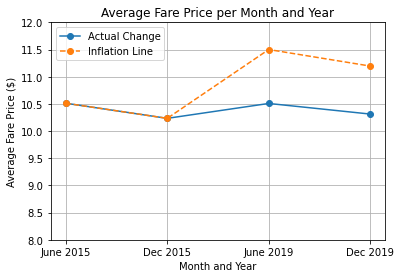

In [152]:
#mean line plot
x_values = ("June 2015", "Dec 2015", "June 2019", "Dec 2019")
y_values = (june_15_mean, dec_15_mean, june_mean, dec_mean)
plt.plot(x_values, y_values, marker ='o', label="Actual Change")
plt.title('Average Fare Price per Month and Year')
plt.ylabel('Average Fare Price ($)')
plt.xlabel('Month and Year')

#inflation line
x_values2 = ("June 2015", "Dec 2015", "June 2019", "Dec 2019")
y_values2 = (june_15_mean, dec_15_mean, june_inflation, dec_inflation)
plt.plot(x_values2, y_values2, marker ='o', linestyle='--', label='Inflation Line')
plt.grid()
plt.ylim([8, 12])
plt.legend()

# Ride duration

# Ride times

In [153]:
# Taxi Pick-ups for June 2015
# Identify 4 different times of day and count the number of for vehicle rides that occur in each 6 hour interval
# yt_june_2015_df

yt_morning_june_15_df = june_2015_taxi.loc[(june_2015_taxi['pickup_time'] > '05:00:00') & (june_2015_taxi['pickup_time']<='11:00:00')]
yt_june_morn_count = yt_morning_june_15_df.shape[0]

yt_day_june_15_df = june_2015_taxi.loc[(june_2015_taxi['pickup_time'] > '11:00:00') & (june_2015_taxi['pickup_time']<='17:00:00')]
yt_june_day_count = yt_day_june_15_df.shape[0]

yt_evening_june_15_df =june_2015_taxi.loc[(june_2015_taxi['pickup_time'] > '17:00:00') & (june_2015_taxi['pickup_time']<='23:00:00')]
yt_june_eve_count = yt_evening_june_15_df.shape[0]

yt_late_night_june_15_df = june_2015_taxi.loc[(june_2015_taxi['pickup_time'] > '23:00:00')]
yt_june_ln_count = yt_late_night_june_15_df.shape[0]

yt_later_night_june_15_df = june_2015_taxi.loc[(june_2015_taxi['pickup_time'] <= '05:00:00')]
yt_june_lrn_count = yt_later_night_june_15_df.shape[0]

yt_june_afthrs_count = yt_june_lrn_count + yt_june_ln_count

In [154]:
# Taxi Pick-ups for December 2015
# Identify 4 different times of day and count the number of for vehicle rides that occur in each 6 hour interval
# yt_dec_2015_df

yt_morning_dec_15_df = dec_2019_taxi.loc[(dec_2019_taxi['pickup_time'] > '05:00:00') & (dec_2019_taxi['pickup_time']<='11:00:00')]
yt_dec_morn_count = yt_morning_dec_15_df.shape[0]

yt_day_dec_15_df = dec_2019_taxi.loc[(dec_2019_taxi['pickup_time'] > '11:00:00') & (dec_2019_taxi['pickup_time']<='17:00:00')]
yt_dec_day_count = yt_day_dec_15_df.shape[0]

yt_evening_dec_15_df = dec_2019_taxi.loc[(dec_2019_taxi['pickup_time'] > '17:00:00') & (dec_2019_taxi['pickup_time']<='23:00:00')]
yt_dec_eve_count = yt_evening_dec_15_df.shape[0]

yt_late_night_dec_15_df = dec_2019_taxi.loc[(dec_2019_taxi['pickup_time'] > '23:00:00')]
yt_dec_ln_count = yt_late_night_dec_15_df.shape[0]

yt_later_night_dec_15_df = dec_2019_taxi.loc[(dec_2019_taxi['pickup_time'] <= '05:00:00')]
yt_dec_lrn_count = yt_later_night_dec_15_df.shape[0]

yt_dec_afthrs_count = yt_dec_lrn_count + yt_dec_ln_count

In [156]:
# For Hire Vehicles Pick-ups for June 2015
# Identify 4 different times of day and count the number of for vehicle rides that occur in each 6 hour interval
# fvh_june_2015_df

fhv_morning_june_15_df = june_2015_fhv.loc[(june_2015_fhv['pickup_time'] > '05:00:00') & (june_2015_fhv['pickup_time']<='11:00:00')]
fhv_june_morn_count = fhv_morning_june_15_df.shape[0]

fhv_day_june_15_df = june_2015_fhv.loc[(june_2015_fhv['pickup_time'] > '11:00:00') & (june_2015_fhv['pickup_time']<='17:00:00')]
fhv_june_day_count = fhv_day_june_15_df.shape[0]

fhv_evening_june_15_df = june_2015_fhv.loc[(june_2015_fhv['pickup_time'] > '17:00:00') & (june_2015_fhv['pickup_time']<='23:00:00')]
fhv_june_eve_count = fhv_evening_june_15_df.shape[0]

fhv_late_night_june_15_df = june_2015_fhv.loc[(june_2015_fhv['pickup_time'] > '23:00:00')]
fhv_june_ln_count = fhv_late_night_june_15_df.shape[0]

fhv_later_night_june_15_df = june_2015_fhv.loc[(june_2015_fhv['pickup_time'] <= '05:00:00')]
fhv_june_lrn_count = fhv_later_night_june_15_df.shape[0]

fhv_june_afthrs_count = fhv_june_lrn_count + fhv_june_ln_count

In [157]:
# For Hire Vehicles Pick-ups for December 2015
# Identify 4 different times of day and count the number of for hire rides that occur in each 6 hour interval
# fhv_dec_2015_df

fhv_morning_dec_15_df = dec_2015_fhv.loc[(dec_2015_fhv['pickup_time'] > '05:00:00') & (dec_2015_fhv['pickup_time']<='11:00:00')]
fhv_dec_morn_count = fhv_morning_dec_15_df.shape[0]

fhv_day_dec_15_df = dec_2015_fhv.loc[(dec_2015_fhv['pickup_time'] > '11:00:00') & (dec_2015_fhv['pickup_time']<='17:00:00')]
fhv_dec_day_count = fhv_day_dec_15_df.shape[0]

fhv_evening_dec_15_df = dec_2015_fhv.loc[(dec_2015_fhv['pickup_time'] > '17:00:00') & (dec_2015_fhv['pickup_time']<='23:00:00')]
fhv_dec_eve_count = fhv_evening_dec_15_df.shape[0]

fhv_late_night_dec_15_df = dec_2015_fhv.loc[(dec_2015_fhv['pickup_time'] > '23:00:00')]
fhv_dec_ln_count = fhv_late_night_dec_15_df.shape[0]

fhv_later_night_dec_15_df = dec_2015_fhv.loc[(dec_2015_fhv['pickup_time'] <= '05:00:00')]
fhv_dec_lrn_count = fhv_later_night_dec_15_df.shape[0]

fhv_dec_afthrs_count = fhv_dec_lrn_count + fhv_dec_ln_count

In [158]:
# High Volume for Hire Vehicles Pick-ups for June 2019
# Identify 4 different times of day and count the number of high volume for vehicle rides that occur in each 6 hour interval
# hv_june_2019_df

hv_morning_june_19_df = june_2019_highvol.loc[(june_2019_highvol['pickup_time'] > '05:00:00') & (june_2019_highvol['pickup_time']<='11:00:00')]
hv_june_morn_count = hv_morning_june_19_df.shape[0]

hv_day_june_19_df = june_2019_highvol.loc[(june_2019_highvol['pickup_time'] > '11:00:00') & (june_2019_highvol['pickup_time']<='17:00:00')]
hv_june_day_count = hv_day_june_19_df.shape[0]

hv_evening_june_19_df = june_2019_highvol.loc[(june_2019_highvol['pickup_time'] > '17:00:00') & (june_2019_highvol['pickup_time']<='23:00:00')]
hv_june_eve_count = hv_evening_june_19_df.shape[0]

hv_late_night_june_19_df = june_2019_highvol.loc[(june_2019_highvol['pickup_time'] > '23:00:00')]
hv_june_ln_count = hv_late_night_june_19_df.shape[0]

hv_later_night_june_19_df = june_2019_highvol.loc[(june_2019_highvol['pickup_time'] <= '05:00:00')]
hv_june_lrn_count = hv_later_night_june_19_df.shape[0]

hv_june_afthrs_count = hv_june_lrn_count + hv_june_ln_count

In [159]:
# High Volume for Hire Vehicles Pick-ups for December 2019
# Identify 4 different times of day and count the number of high volume for vehicle rides that occur in each 6 hour interval
# hv_dec_2019_df

hv_morning_dec_19_df = dec_2019_highvol.loc[(dec_2019_highvol['pickup_time'] > '05:00:00') & (dec_2019_highvol['pickup_time']<='11:00:00')]
hv_dec_morn_count = hv_morning_dec_19_df.shape[0]

hv_day_dec_19_df = dec_2019_highvol.loc[(dec_2019_highvol['pickup_time'] > '11:00:00') & (dec_2019_highvol['pickup_time']<='17:00:00')]
hv_dec_day_count = hv_day_dec_19_df.shape[0]

hv_evening_dec_19_df = dec_2019_highvol.loc[(dec_2019_highvol['pickup_time'] > '17:00:00') & (dec_2019_highvol['pickup_time']<='23:00:00')]
hv_dec_eve_count = hv_evening_dec_19_df.shape[0]

hv_late_night_dec_19_df = dec_2019_highvol.loc[(dec_2019_highvol['pickup_time'] > '23:00:00')]
hv_dec_ln_count = hv_late_night_dec_19_df.shape[0]

hv_later_night_dec_19_df = dec_2019_highvol.loc[(dec_2019_highvol['pickup_time'] <= '05:00:00')]
hv_dec_lrn_count = hv_later_night_dec_19_df.shape[0]

hv_dec_afthrs_count = hv_dec_lrn_count + hv_dec_ln_count

In [160]:
# Yellow Taxi Pick-ups for June 2019
# Identify 4 different times of day and count the number of taxi rides that occur in each 6 hour interval
#yt_dec_2019_df

yt_morning_june_19_df = june_2019_taxi.loc[(june_2019_taxi['pickup_time'] > '05:00:00') & (june_2019_taxi['pickup_time']<='11:00:00')]
yt_june_morn_count = yt_morning_june_19_df.shape[0]

yt_day_june_19_df = june_2019_taxi.loc[(june_2019_taxi['pickup_time'] > '11:00:00') & (june_2019_taxi['pickup_time']<='17:00:00')]
yt_june_day_count = yt_day_june_19_df.shape[0]

yt_evening_june_19_df = june_2019_taxi.loc[(june_2019_taxi['pickup_time'] > '17:00:00') & (june_2019_taxi['pickup_time']<='23:00:00')]
yt_june_eve_count = yt_evening_june_19_df.shape[0]

yt_late_night_june_19_df = june_2019_taxi.loc[(june_2019_taxi['pickup_time'] > '23:00:00')]
yt_june_ln_count = yt_late_night_june_19_df.shape[0]

yt_later_night_june_19_df = june_2019_taxi.loc[(june_2019_taxi['pickup_time'] <= '05:00:00')]
yt_june_lrn_count = yt_later_night_june_19_df.shape[0]

yt_june_afthrs_count = yt_june_lrn_count + yt_june_ln_count

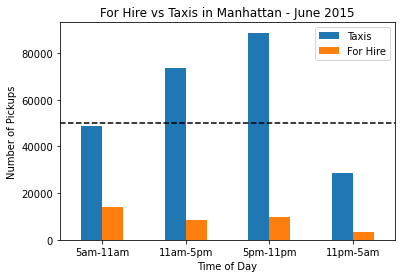

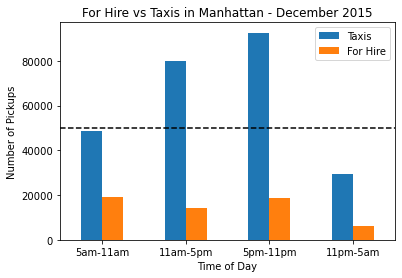

In [161]:
# Plot bar chart to compare yellow cabs & for hire vehicles in June of 2015

fhv_June_2015 = [fhv_june_morn_count, fhv_june_day_count, fhv_june_eve_count, fhv_june_afthrs_count]
yt_June_2015 = [yt_june_morn_count, yt_june_day_count, yt_june_eve_count, yt_june_afthrs_count]
index = ["5am-11am", "11am-5pm", "5pm-11pm", "11pm-5am"]
df = pd.DataFrame({'Taxis': yt_June_2015,
                   'For Hire': fhv_June_2015}, index=index)

df.plot.bar(rot=0)
plt.title("For Hire vs Taxis in Manhattan - June 2015")
plt.ylabel("Number of Pickups")
plt.xlabel("Time of Day")
plt.axhline(y = 50000, color = '0', linestyle = 'dashed')

# Plot bar chart to compare yellow cabs & for hire vehicles in December of 2015

fhv_Dec_2015 = [fhv_dec_morn_count, fhv_dec_day_count, fhv_dec_eve_count, fhv_dec_afthrs_count]
yt_Dec_2015 = [yt_dec_morn_count, yt_dec_day_count, yt_dec_eve_count, yt_dec_afthrs_count]
index = ["5am-11am", "11am-5pm", "5pm-11pm", "11pm-5am"]
df = pd.DataFrame({'Taxis': yt_Dec_2015,
                   'For Hire': fhv_Dec_2015}, index=index)


df.plot.bar(rot=0)
plt.title("For Hire vs Taxis in Manhattan - December 2015")
plt.ylabel("Number of Pickups")
plt.xlabel("Time of Day")
plt.axhline(y = 50000, color = '0', linestyle = 'dashed')

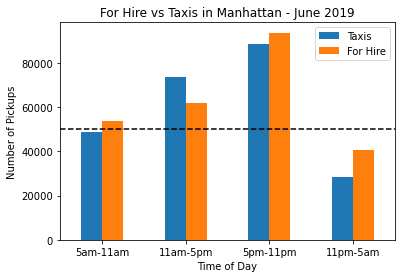

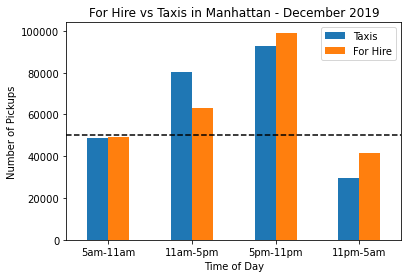

In [162]:
# Plot bar chart to compare yellow cabs & high frequency for hire vehicles in June of 2019

hv_June_2019 = [hv_june_morn_count, hv_june_day_count, hv_june_eve_count, hv_june_afthrs_count]
yt_June_2019 = [yt_june_morn_count, yt_june_day_count, yt_june_eve_count, yt_june_afthrs_count]
index = ["5am-11am", "11am-5pm", "5pm-11pm", "11pm-5am"]
df = pd.DataFrame({'Taxis': yt_June_2019,
                   'For Hire': hv_June_2019}, index=index)

df.plot.bar(rot=0)
plt.title("For Hire vs Taxis in Manhattan - June 2019")
plt.ylabel("Number of Pickups")
plt.xlabel("Time of Day")
plt.axhline(y = 50000, color = '0', linestyle = 'dashed')


# Plot bar chart to compare yellow cabs & high frequency for hire vehicles in December of 2019

hv_Dec_2019 = [hv_dec_morn_count, hv_dec_day_count, hv_dec_eve_count, hv_dec_afthrs_count]
yt_Dec_2019 = [yt_dec_morn_count, yt_dec_day_count, yt_dec_eve_count, yt_dec_afthrs_count]
index = ["5am-11am", "11am-5pm", "5pm-11pm", "11pm-5am"]
df = pd.DataFrame({'Taxis': yt_Dec_2019,
                   'For Hire': hv_Dec_2019}, index=index)

df.plot.bar(rot=0)
plt.title("For Hire vs Taxis in Manhattan - December 2019")
plt.ylabel("Number of Pickups")
plt.xlabel("Time of Day")
plt.axhline(y = 50000, color = '0', linestyle = 'dashed')

# Pickup locations heatmap

In [163]:
june_2015_taxi.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,pickup_time,Month
0,20,2015-06-02,2015-06-02 11:34:36,1,3.90,-73.949623,40.772671,1,-73.987640,40.735611,15.5,3.25,19.55,11:19:48,6
1,34,2015-06-02,2015-06-02 11:28:29,5,0.85,-74.006416,40.733501,1,-73.996292,40.725971,7.0,1.56,9.36,11:19:58,6
2,40,2015-06-02,2015-06-02 11:25:08,1,0.80,-73.995033,40.725391,1,-73.989548,40.735748,5.5,1.26,7.56,11:20:02,6
3,43,2015-06-02,2015-06-02 12:02:22,2,5.30,-73.955170,40.788544,1,-74.001060,40.736637,27.0,5.55,33.35,11:20:05,6
4,47,2015-06-02,2015-06-02 11:26:40,1,0.99,-73.997749,40.730190,1,-73.986282,40.734440,6.0,0.00,6.80,11:20:07,6


In [164]:
locations_taxi_2015 = june_2015_taxi[["pickup_latitude","pickup_longitude"]]
taxi_2015_pickup_rate = june_2015_taxi["passenger_count"].astype(float)

In [112]:

fig = gmaps.figure()

taxi_heat_layer_2015 = gmaps.heatmap_layer(locations_taxi_2015, weights=taxi_2015_pickup_rate, 
                                  dissipating=False, max_intensity=100,
                                  point_radius = .0003)
                                 

fig.add_layer(taxi_heat_layer_2015)

fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
june_2019_taxi.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.00,1,262,263,2.5,0.00,6.30,2019-06-01,00:06:31,2019-06-01,00:06:52
1,78,2019-06-01 00:37:38,2019-06-01 00:41:39,1,0.60,1,237,263,5.0,0.00,8.80,2019-06-01,00:37:38,2019-06-01,00:41:39
2,92,2019-06-01 00:57:21,2019-06-01 01:12:09,2,3.10,1,230,263,12.5,3.25,19.55,2019-06-01,00:57:21,2019-06-01,01:12:09
3,128,2019-06-01 00:51:48,2019-06-01 00:59:28,1,1.73,1,141,263,8.0,2.00,13.80,2019-06-01,00:51:48,2019-06-01,00:59:28
4,141,2019-06-01 00:46:00,2019-06-01 00:48:17,1,0.80,1,263,141,4.5,1.65,9.95,2019-06-01,00:46:00,2019-06-01,00:48:17


In [20]:
june_2019_taxi_df = june_2019_taxi.rename(columns={'PULocationID': 'LocationID'})
june_2019_taxi_df

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,LocationID,DOLocationID,fare_amount,tip_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.00,1,262,263,2.5,0.00,6.30,2019-06-01,00:06:31,2019-06-01,00:06:52
1,78,2019-06-01 00:37:38,2019-06-01 00:41:39,1,0.60,1,237,263,5.0,0.00,8.80,2019-06-01,00:37:38,2019-06-01,00:41:39
2,92,2019-06-01 00:57:21,2019-06-01 01:12:09,2,3.10,1,230,263,12.5,3.25,19.55,2019-06-01,00:57:21,2019-06-01,01:12:09
3,128,2019-06-01 00:51:48,2019-06-01 00:59:28,1,1.73,1,141,263,8.0,2.00,13.80,2019-06-01,00:51:48,2019-06-01,00:59:28
4,141,2019-06-01 00:46:00,2019-06-01 00:48:17,1,0.80,1,263,141,4.5,1.65,9.95,2019-06-01,00:46:00,2019-06-01,00:48:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239500,6940925,2019-06-30 23:41:30,2019-06-30 23:53:41,1,2.51,1,230,263,11.0,2.96,17.76,2019-06-30,23:41:30,2019-06-30,23:53:41
239501,6940926,2019-06-30 23:57:06,2019-06-30 23:59:12,1,0.50,1,263,141,4.0,1.56,9.36,2019-06-30,23:57:06,2019-06-30,23:59:12
239502,6940992,2019-06-30 23:48:01,2019-06-30 23:52:21,1,1.66,1,141,263,6.5,2.06,12.36,2019-06-30,23:48:01,2019-06-30,23:52:21
239503,6941011,2019-06-30 23:12:53,2019-06-30 23:19:11,1,1.40,1,263,43,7.0,0.00,10.80,2019-06-30,23:12:53,2019-06-30,23:19:11


In [79]:
merged_june_2019_taxi = june_2019_taxi_df.merge(manhattan_zone_locations, how='left', on= "LocationID")
merged_june_2019_taxi= merged_june_2019_taxi.dropna()
merged_june_2019_taxi

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,LocationID,DOLocationID,fare_amount,tip_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,Zone,Lat,Long
0,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.00,1,262,263,2.5,0.00,6.30,2019-06-01,00:06:31,2019-06-01,00:06:52,Yorkville East,40.776223,-73.949208
1,78,2019-06-01 00:37:38,2019-06-01 00:41:39,1,0.60,1,237,263,5.0,0.00,8.80,2019-06-01,00:37:38,2019-06-01,00:41:39,Upper East Side South,40.773565,-73.956555
2,92,2019-06-01 00:57:21,2019-06-01 01:12:09,2,3.10,1,230,263,12.5,3.25,19.55,2019-06-01,00:57:21,2019-06-01,01:12:09,Times Sq/Theatre District,40.759227,-73.984638
3,128,2019-06-01 00:51:48,2019-06-01 00:59:28,1,1.73,1,141,263,8.0,2.00,13.80,2019-06-01,00:51:48,2019-06-01,00:59:28,Lenox Hill West,40.766232,-73.960231
4,141,2019-06-01 00:46:00,2019-06-01 00:48:17,1,0.80,1,263,141,4.5,1.65,9.95,2019-06-01,00:46:00,2019-06-01,00:48:17,Yorkville West,40.776223,-73.949208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239500,6940925,2019-06-30 23:41:30,2019-06-30 23:53:41,1,2.51,1,230,263,11.0,2.96,17.76,2019-06-30,23:41:30,2019-06-30,23:53:41,Times Sq/Theatre District,40.759227,-73.984638
239501,6940926,2019-06-30 23:57:06,2019-06-30 23:59:12,1,0.50,1,263,141,4.0,1.56,9.36,2019-06-30,23:57:06,2019-06-30,23:59:12,Yorkville West,40.776223,-73.949208
239502,6940992,2019-06-30 23:48:01,2019-06-30 23:52:21,1,1.66,1,141,263,6.5,2.06,12.36,2019-06-30,23:48:01,2019-06-30,23:52:21,Lenox Hill West,40.766232,-73.960231
239503,6941011,2019-06-30 23:12:53,2019-06-30 23:19:11,1,1.40,1,263,43,7.0,0.00,10.80,2019-06-30,23:12:53,2019-06-30,23:19:11,Yorkville West,40.776223,-73.949208


In [116]:
locations_taxi_2019 = merged_june_2019_taxi[["Lat", "Long"]]
pickup_rate = merged_june_2019_taxi["passenger_count"].astype(float)

In [117]:
taxi_2019_fig = gmaps.figure()



taxi_heat_layer_2019 = gmaps.heatmap_layer(locations_taxi_2019, weights=pickup_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = .002)

    
taxi_2019_fig.add_layer(taxi_heat_layer_2019)

taxi_2019_fig

Figure(layout=FigureLayout(height='420px'))

In [87]:
june_2015_fhv_df = june_2015_fhv.rename(columns={'locationID': 'LocationID'})
june_2015_fhv_df

,Unnamed: 0,Dispatching_base_num,Pickup_date,LocationID,pickup_date,pickup_time
0,61562,B00221,2015-06-03 14:27:00,263.0,2015-06-03,14:27:00
1,61839,B00221,2015-06-04 08:53:00,263.0,2015-06-04,08:53:00
2,61961,B00221,2015-06-04 10:51:00,263.0,2015-06-04,10:51:00
3,62546,B00221,2015-06-05 10:45:00,263.0,2015-06-05,10:45:00
4,62582,B00221,2015-06-05 11:29:00,263.0,2015-06-05,11:29:00
...,...,...,...,...,...,...
35585,4253182,B02836,2015-06-20 13:32:00,263.0,2015-06-20,13:32:00
35586,4253297,B02836,2015-06-21 23:13:00,263.0,2015-06-21,23:13:00
35587,4253439,B02836,2015-06-24 13:50:00,263.0,2015-06-24,13:50:00
35588,4253578,B02836,2015-06-26 17:37:00,263.0,2015-06-26,17:37:00


In [118]:
merged_june_2015_fhv = june_2015_fhv_df.merge(manhattan_zone_locations, how='left', on= "LocationID")
merged_june_2015_fhv= merged_june_2015_fhv.dropna()
merged_june_2015_fhv

,Unnamed: 0,Dispatching_base_num,Pickup_date,LocationID,pickup_date,pickup_time,Zone,Lat,Long
0,61562,B00221,2015-06-03 14:27:00,263.0,2015-06-03,14:27:00,Yorkville West,40.776223,-73.949208
1,61839,B00221,2015-06-04 08:53:00,263.0,2015-06-04,08:53:00,Yorkville West,40.776223,-73.949208
2,61961,B00221,2015-06-04 10:51:00,263.0,2015-06-04,10:51:00,Yorkville West,40.776223,-73.949208
3,62546,B00221,2015-06-05 10:45:00,263.0,2015-06-05,10:45:00,Yorkville West,40.776223,-73.949208
4,62582,B00221,2015-06-05 11:29:00,263.0,2015-06-05,11:29:00,Yorkville West,40.776223,-73.949208
...,...,...,...,...,...,...,...,...,...
35585,4253182,B02836,2015-06-20 13:32:00,263.0,2015-06-20,13:32:00,Yorkville West,40.776223,-73.949208
35586,4253297,B02836,2015-06-21 23:13:00,263.0,2015-06-21,23:13:00,Yorkville West,40.776223,-73.949208
35587,4253439,B02836,2015-06-24 13:50:00,263.0,2015-06-24,13:50:00,Yorkville West,40.776223,-73.949208
35588,4253578,B02836,2015-06-26 17:37:00,263.0,2015-06-26,17:37:00,Yorkville West,40.776223,-73.949208


In [119]:
fhv_2015_locations = merged_june_2015_fhv[["Lat", "Long"]]


In [121]:
fhv_2015_fig = gmaps.figure()


fhv_2015_heat_layer = gmaps.heatmap_layer(fhv_2015_locations, dissipating=False, max_intensity=100,
                                 point_radius = .002)
    
fhv_2015_fig.add_layer(fhv_2015_heat_layer)

fhv_2015_fig

Figure(layout=FigureLayout(height='420px'))

In [96]:
june_2019_highvol_df = june_2019_highvol.rename(columns={'PULocationID': 'LocationID'})
june_2019_highvol_df

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,LocationID,DOLocationID,pickup_time
0,90,HV0004,B02800,2019-06-01,2019-06-01 00:16:41,237,263,00:09:57
1,143,HV0003,B02869,2019-06-01,2019-06-01 00:37:38,45,263,00:20:37
2,171,HV0003,B02884,2019-06-01,2019-06-01 00:41:14,170,263,00:30:42
3,199,HV0003,B02764,2019-06-01,2019-06-01 00:39:28,263,236,00:34:54
4,273,HV0003,B02835,2019-06-01,2019-06-01 01:18:08,179,263,00:34:46
...,...,...,...,...,...,...,...,...
249826,21001465,HV0005,B02510,2019-06-30,2019-06-30 23:30:13,255,263,23:03:57
249827,21001521,HV0004,B02800,2019-06-30,2019-06-30 23:52:03,263,179,23:37:57
249828,21001585,HV0003,B02764,2019-06-30,2019-06-30 23:34:53,263,265,23:07:00
249829,21001726,HV0005,B02510,2019-06-30,2019-06-30 23:32:39,263,162,23:24:17


In [98]:
merged_june_2019_highvol = june_2019_highvol_df.merge(manhattan_zone_locations, how='left', on= "LocationID")
merged_june_2019_highvol= merged_june_2019_highvol.dropna()
merged_june_2019_highvol

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,LocationID,DOLocationID,pickup_time,Zone,Lat,Long
0,90,HV0004,B02800,2019-06-01,2019-06-01 00:16:41,237,263,00:09:57,Upper East Side South,40.773565,-73.956555
1,143,HV0003,B02869,2019-06-01,2019-06-01 00:37:38,45,263,00:20:37,Chinatown,40.715751,-73.997031
2,171,HV0003,B02884,2019-06-01,2019-06-01 00:41:14,170,263,00:30:42,Murray Hill,40.747879,-73.975657
3,199,HV0003,B02764,2019-06-01,2019-06-01 00:39:28,263,236,00:34:54,Yorkville West,40.776223,-73.949208
5,279,HV0003,B02765,2019-06-01,2019-06-01 00:28:06,263,148,00:11:25,Yorkville West,40.776223,-73.949208
...,...,...,...,...,...,...,...,...,...,...,...
249823,21001256,HV0005,B02510,2019-06-30,2019-06-30 23:42:14,263,151,23:29:08,Yorkville West,40.776223,-73.949208
249824,21001412,HV0004,B02800,2019-06-30,2019-06-30 23:31:20,263,90,23:03:57,Yorkville West,40.776223,-73.949208
249827,21001521,HV0004,B02800,2019-06-30,2019-06-30 23:52:03,263,179,23:37:57,Yorkville West,40.776223,-73.949208
249828,21001585,HV0003,B02764,2019-06-30,2019-06-30 23:34:53,263,265,23:07:00,Yorkville West,40.776223,-73.949208


In [106]:
fhv_2019_locations = merged_june_2019_highvol[["Lat", "Long"]]
# fhv_2019_pickup_rate = merged_june_2019_highvol[""].astype(float)

In [122]:
fhv_2019_fig = gmaps.figure()


fhv_2019_heat_layer = gmaps.heatmap_layer(fhv_2019_locations, dissipating=False, max_intensity=100,
                                 point_radius = .002)
    
fhv_2019_fig.add_layer(fhv_2019_heat_layer)

fhv_2019_fig

Figure(layout=FigureLayout(height='420px'))